In [1]:
from PIL import Image
import numpy
from numpy import array
import numpy as np
from tkinter import _flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessingrom import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn import svm
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import math
import pandas as pd

# Q1

In [2]:
#reading data
image_matrix = np.zeros((400, 2576))
gender = np.array([])
for j in range(0, 40):
    for i in range(0, 10):
        image = Image.open("E:/course/資料分析/Homework/HW6/ORL Faces/%s_%s.png" %(j+1, i+1))
        image_array = array(image)
        image_matrix[i+j*10] = image_array.flatten()
gender = [10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[0],10*[1],10*[0]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]]
gender = list(_flatten(gender))

In [3]:
X = image_matrix
y = gender
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Normalize
sc=StandardScaler()
sc.fit(X_train)
X_train_nor=sc.transform(X_train)
X_test_nor=sc.transform(X_test)

In [4]:
# Create LogisticRegression Model
lr=LogisticRegression()
lr.fit(X_train_nor,y_train)
print("Accuracy of Logistic Regression model: ",100*lr.score(X_test_nor, y_test),"%")

Accuracy of Logistic Regression model:  96.25 %


D:\Application\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [5]:
# Create KNN Model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_nor,y_train)
print("Accuracy of KNN model: ",100*knn.score(X_test_nor, y_test),"%")

Accuracy of KNN model:  97.5 %


In [6]:
# Create SVM Model
clf=svm.SVC(kernel='linear',C=1)
clf.fit(X_train,y_train)
print("Accuracy of SVM model: ",100*clf.score(X_test_nor, y_test),"%")

Accuracy of SVM model:  88.75 %


KNN(n=5)的Model 與Logistic Regression Model皆有很好的表現

# Q2

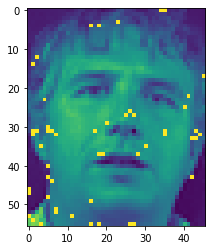

In [7]:
#Using LASSO
lasso = Lasso(alpha = 0.001,normalize = True)
lasso.fit(X, y)
important_pixels = []
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        important_pixels.append(i)
image = Image.open("E:/course/資料分析/Homework/HW6/ORL Faces/15_1.png")
img_array = np.array(image)
#print(len(important_pixels),"important pixels at")
for i in range(0, len(important_pixels)): #math.floor()
    col = math.floor(important_pixels[i]/46)
    row = important_pixels[i]-46*col
    #print("(",col,",", row,")")    
    img_array[int(col)][int(row)]=255
plt.imshow(img_array, interpolation='nearest')
plt.show()

In [8]:
#selecting important pixels
X_important = np.zeros((400, len(important_pixels)))
X_important = X.T[important_pixels]
X_important = X_important.T

In [9]:
# Split data
X_important_train, X_important_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=1)
# Normalize
sc=StandardScaler()
sc.fit(X_important_train)
X_important_train_nor=sc.transform(X_important_train)
X_important_test_nor=sc.transform(X_important_test)

In [10]:
# Create LogisticRegression Model
lr=LogisticRegression()
lr.fit(X_important_train_nor,y_train)
print("Accuracy of LR model after using LASSO reduction: ",100*lr.score(X_important_test_nor, y_test),"%")

Accuracy of LR model after using LASSO reduction:  97.5 %


In [11]:
# Create KNN Model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_important_train_nor,y_train)
print("Accuracy of KNN model after using LASSO reduction: ",100*knn.score(X_important_test_nor, y_test),"%")

Accuracy of KNN model after using LASSO reduction:  97.5 %


In [12]:
# Create SVM Model
clf=svm.SVC(kernel='linear',C=1)
clf.fit(X_important_train_nor,y_train)
print("Accuracy of SVM model after using LASSO reduction: ",100*clf.score(X_important_test_nor, y_test),"%")

Accuracy of SVM model after using LASSO reduction:  96.25 %


經過LASSO的調整，Model在準確度的表現上有明顯的提升

# Q3

In [13]:
#reading data
df = pd.read_csv('E:/auto-mpg.data.csv')

In [14]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [15]:
y = df[['origin']].values.reshape(-1, 1)

In [16]:
x = df.drop('origin', axis = 1).values

In [21]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Normalize
sc=StandardScaler()
sc.fit(X_train)
X_train_nor=sc.transform(X_train)
X_test_nor=sc.transform(X_test)

In [22]:
# Create LogisticRegression Model
lr=LogisticRegression()
lr.fit(X_train_nor,y_train)
print("Accuracy of Logistic Regression model: ",100*lr.score(X_test_nor, y_test),"%")

Accuracy of Logistic Regression model:  83.54430379746836 %


D:\Application\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
# Create KNN Model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_nor,y_train)
print("Accuracy of KNN model: ",100*knn.score(X_test_nor, y_test),"%")

Accuracy of KNN model:  78.48101265822784 %


D:\Application\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# Create SVM Model
clf=svm.SVC(kernel='linear',C=1)
clf.fit(X_train_nor,y_train)
print("Accuracy of SVM model: ",100*clf.score(X_test_nor, y_test),"%")

Accuracy of SVM model:  77.21518987341773 %


D:\Application\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Model有較好的表現